In [1]:
from fastai.vision.all import *
#from fastai.vision import *
from fastai.metrics import *
#from fastbook import *

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import torch
import torchvision
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

In [6]:
torch.cuda.empty_cache()


In [27]:
# Set path to root directory
path = Path('./flower_data')

In [28]:
# View all files in directory
path.ls()

(#2) [Path('flower_data/train'),Path('flower_data/valid')]

In [29]:
# We are creating a fastai DataBunch from our dataset
# Preprocessing takes place when creating the databunch
# May need to decrease batch size and num_workers depending on GPU
data = ImageDataLoaders.from_folder(path, train='train', valid='valid',item_tfms=Resize(224), size=224, bs=16,num_workers=0)

In [30]:
data.vocab


['1', '10', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', '7', '8', '9']

In [31]:
# See the classes and count of classes in your dataset
print(data.vocab,data.c)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', '7', '8', '9'] 17


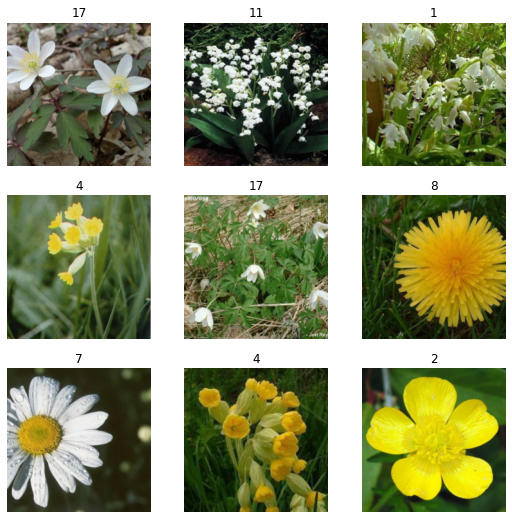

In [32]:
# Show what the data looks like after being transformed
data.show_batch()

In [33]:
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

1190 170


In [34]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.vgg19_bn, metrics = [accuracy,Precision(average='micro'),Recall(average='micro'),F1Score(average='micro')],)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to C:\Users\adity/.cache\torch\hub\checkpoints\vgg19_bn-c79401a0.pth
100%|██████████████████████████████████████████████████████| 548M/548M [03:27<00:00, 2.77MB/s]


In [35]:
defaults.device = torch.device('cuda')

In [36]:
# Train the model on 5 epochs of data at the default learning rate
#learn.fit_one_cycle(5)
learn.fine_tune(5)

In [37]:
learn.export()

In [38]:
#import torch
from fastai.vision.all import Path,load_learner,Image
import numpy as np
#from fastai.vision import *
import pandas as pd

In [39]:
df = pd.read_csv("./cat_to_name.csv")

In [40]:
path = Path('flower_data/export.pkl')

In [41]:
learn = load_learner(path)

In [42]:
import PIL.Image
import numpy as np

In [43]:
pil_img = PIL.Image.open('flower_data/valid/14/image_0726.jpg')

In [44]:
img = np.asarray(pil_img)
learn.predict(img)

('14',
 TensorBase(5),
 TensorBase([4.1335e-07, 6.8669e-06, 2.3416e-08, 1.0579e-05, 3.0735e-09, 9.9996e-01,
         1.5265e-06, 1.8478e-07, 4.1873e-07, 7.6929e-06, 2.6597e-08, 6.5088e-07,
         2.2993e-07, 6.8532e-06, 6.7448e-08, 1.2698e-06, 2.0447e-07]))

In [45]:
round(np.max(np.array(learn.predict(img)[2]))*100,2)

100.0

In [46]:
def get_name(cat_num):
    return df[df.index == cat_num].reset_index(drop=True)['Cat_Name'][0]
def get_details(cat_num):
    return df[df.index == cat_num].T.reset_index().rename(columns={"index": "Major", 1: "Description"})[1:]
def predict_img(img):
    pil_img = PIL.Image.open(img)
    img = np.asarray(pil_img) # Image to display   
    return get_details(int(learn.predict(img)[0])),round(np.max(np.array(learn.predict(img)[2]))*100,2)

In [47]:
pred_class, prob = predict_img('flower_data/valid/14/image_0726.jpg')


In [48]:
pred_class


Major
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17

In [49]:
print("Flower Name:  [" + str(pred_class) + "] " + "| Probability: [" + str(prob) + '%]')


Flower Name:  [   Major
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17] | Probability: [100.0%]


In [50]:
get_details(1)

Major
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17